In [32]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics


from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.model_selection import KFold

* Is the relationship significant?   
　 yes. Because the P value are very small.
* Are any model assumptions violated? 
  no. "vote_average" and "runtime" don't highly correlated too much. Because the P value is big than others. 
* Is there any multi-colinearity in the model?  
  no. from the diagram, vote_average cannot be linearly predicted from vote_count.
* In the multiple regression models are predictor variables independent of all the other predictor variables? 
  yes. There are independent.  
* In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
  vote_count. Beacause the P value of "vote_count" is the most smallest one.
  
* Does the model make sense?  
  Yes. It show the linear relationship between the independent variables and the dependent variable.
   
* Cross-validate the model. How well did it do?    
  


In [2]:
df=pd.read_csv('data.csv')
df1=df.dropna()
df1

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009/12/10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015/10/26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/7/16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/3/7,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/1,8.908716e+08,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010/11/24,5.917949e+08,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/mov

In [3]:
df1.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.547000e+03,1547.000000,1547.000000,1.547000e+03,1547.000000,1547.000000,1547.000000
mean,5.203828e+07,65716.080155,35.012719,1.898424e+08,108.686490,6.266904,1291.231416
std,5.535797e+07,89896.277342,47.479694,1.195784e+09,19.448192,0.978364,1770.790485
min,0.000000e+00,11.000000,0.023681,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000e+07,8268.000000,11.136695,1.893865e+07,95.000000,5.750000,197.000000
50%,2.800000e+07,26428.000000,24.606012,5.990191e+07,106.000000,6.300000,594.000000
75%,6.100000e+07,76418.000000,44.417377,1.841820e+08,120.000000,6.900000,1622.000000
max,8.645732e+08,426469.000000,875.581305,4.544645e+10,201.000000,8.400000,13752.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 4801
Data columns (total 20 columns):
budget                  1547 non-null int64
genres                  1547 non-null object
homepage                1547 non-null object
id                      1547 non-null int64
keywords                1547 non-null object
original_language       1547 non-null object
original_title          1547 non-null object
overview                1547 non-null object
popularity              1547 non-null float64
production_companies    1547 non-null object
production_countries    1547 non-null object
release_date            1547 non-null object
revenue                 1547 non-null float64
runtime                 1547 non-null float64
spoken_languages        1547 non-null object
status                  1547 non-null object
tagline                 1547 non-null object
title                   1547 non-null object
vote_average            1547 non-null float64
vote_count              1547 non-nul

In [30]:
X = df1[["vote_average"]]
y = df1[["vote_count"]]


In [34]:
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

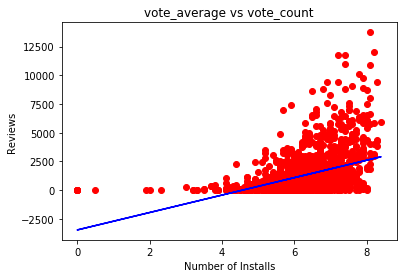

In [38]:
# Visualising the dataset set results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('vote_average vs vote_count')
plt.xlabel('Number of Installs')
plt.ylabel('Reviews')
plt.show()

In [5]:
X = df1[["budget","vote_average","vote_count","runtime"]]
y = df1[["revenue"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-6793276.29800886] [[ 1.68321594e+00 -2.64449280e+07  5.92803373e+04  1.82384433e+06]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     19.21
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           1.94e-15
Time:                        15:49:38   Log-Likelihood:                -34512.
No. Observations:                1547   AIC:                         6.903e+04
Df Residuals:                    1543   BIC:                         6.905e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
budget           1.6804      0.648      2.594      0.010       0.410       2.951
vote_average -2.713e+07   2.67e+07     -1.017      0.309   -7.95e+07    2.52e+07
vote_count    5.955e+04   2.03e+04      2.933      0.003    1.97e+04    9.94e+04
runtime         1.8e+06   1.58e+06      1.136      0.256   -1.31e+06    4.91e+06
==============================================================================
Omnibus:                     4432.905   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        125948502.767
Skew:                          36.693   Prob(JB):                         0.00
Kurtosis:                    1398.911   Cond. No.                     6.75e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
kf = KFold(n_splits=5)

kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [9]:
linreg = LinearRegression()

In [39]:
y_pred = linreg.predict(X_test)

In [40]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

508016177.2673385

In [13]:
# RMSE using 5-fold cross-validation

for train,test in kf.split(X):
    print (train)
    print (test)
    scores = []
# for train, test in kf.split(X):
#     linreg.fit(X[train],y[train])
#     scores.append(np.sqrt(metrics.mean_squared_error(y[test], linreg.predict(X[test]))))
# scores

[ 310  311  312 ... 1544 1545 1546]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [14]:
# Testing

for train,test in kf.split(X):
    linreg.fit(X_train, y_train)
    scores.append(np.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))))

print(scores)

[508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385]


In [15]:
np.mean(scores)

508016177.2673386

In [16]:
np.median(scores)

508016177.2673385

In [17]:
np.std(scores)

5.960464477539063e-08

In [18]:
#Cross 
def show_stats(m, ncv, cv):
    print('Method: %s' %m)
    print('RMSE on no CV training: %.3f' %ncv)
    print('RMSE on 5-fold CV: %.3f' %cv)


In [41]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 508016177.267
RMSE on 5-fold CV: 508016177.267


In [27]:
# Part 2
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 1.0, 'Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\\hat{y}_i$')

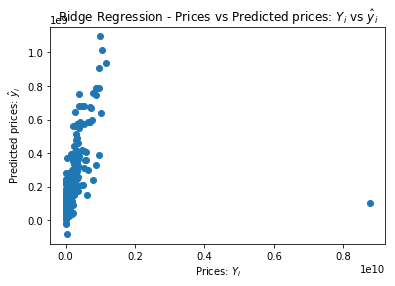

In [28]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In [22]:
for train,test in kf.split(X):
    linreg.fit(X_train, y_train)
    scores.append(np.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))))

print(scores)


[508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385, 508016177.2673385]


In [42]:
show_stats('Ridge Regression',rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 508016177.267
RMSE on 5-fold CV: 508016177.267


In [24]:
lasso=Lasso(fit_intercept=True, alpha=5.0)
lasso.fit(X_train, y_train)

Lasso(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

[ 1.86175740e+08  1.67714096e+08  6.67032708e+08  5.83168232e+08
  5.30967822e+07  5.28989175e+07  1.48168093e+08  7.56139636e+08
  2.89534122e+07  6.56889374e+07  2.08383434e+08 -8.35066805e+07
  7.26932072e+07  1.49936927e+08  3.55972444e+07  7.97900383e+06
  4.79191121e+07  3.10220827e+07  7.36376232e+07  1.36890408e+08
  1.88535996e+08  5.41345172e+07  2.45861645e+08  1.47514231e+08
  6.82402761e+08  5.75728285e+08  1.29037562e+08  2.45841912e+08
  5.84195808e+08  1.11429383e+08  2.13185429e+08  3.22782609e+08
  2.44134505e+07  6.75870133e+07  8.92315423e+07  2.93455942e+08
  7.31601905e+07  1.00012859e+08  2.12767335e+08  1.09556596e+09
  3.10875203e+07  3.67759502e+08  9.98383047e+07  2.96385446e+08
  5.58540404e+08  1.61999759e+08  2.40215925e+08  1.14147541e+08
  3.21868101e+08  1.70945781e+08  2.77040874e+07  1.81453927e+08
  3.59849070e+08  5.52115205e+08  2.08211617e+08  8.78792506e+07
  1.99623584e+08  7.12119596e+07  5.88556452e+07  7.86220744e+08
  5.20008360e+07  3.16981

Text(0.5, 1.0, 'Revenue vs Predicted Revenue: $Y_i$ vs $\\hat{y}_i$')

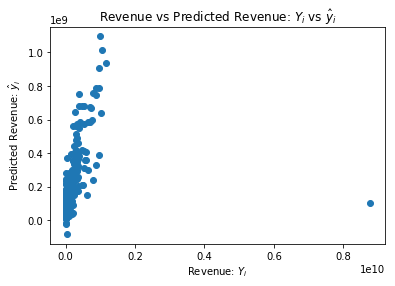

In [25]:
y_pred1 = lasso.predict(X_test)
print(y_pred1)
plt.scatter(y_test, y_pred)
plt.xlabel("Revenue: $Y_i$")
plt.ylabel("Predicted Revenue: $\hat{y}_i$")
plt.title("Revenue vs Predicted Revenue: $Y_i$ vs $\hat{y}_i$")

Does regularization help with creating models that validate better on out of sample data?   

no